# Notebook tutorial


This notebook contains a tutorial of how to create synthetic spectral cubes of a bowshock model using the tools provided by the BowshockPy package. As will be shown here, importing BowshockPy classes in your custom scripts provide a more flexible usage than just running BowshockPy from the terminal. 

As an example, this notebook shows how to obtain a synthetic spectral cube, moments maps, and position-velocity diagrams of two redshifted bowshocks of the same molecular jet. In particular, we will model the emission from the CO(J=3-2) transition.

We will need to import four classes from BowshockPy and follow these steps:
1. Create the bowshock model with **BowshockModel**: This class contains all the equations of an analytic momentum-conserving bowshock model. It can be instantiated using the model parameters as input arguments, and the model can be visualized with _get_modelplot_ method.
2. Obtain the projection of the bowshock model with **ObsModel**: This class contains all the equations needed to project the bowshock model (the morphology will be projected in the plane of the sky, the kinematics along the line of sight). You will need to provide some parameters that depend on the observer (as the inclination angle and the systemic velocity) in order to instantiate the class. The method _get_obsmodelplot_ allows to visualize the projected morphology and kinematics of the bowshock model.
3. Compute the masses of the spectral cube with **BowshockCube**: This class computes the amount of mass of the bowshock shell that corresponds to each pixel and velocity channel of the spectral cube. It also contains the the _plot_channel_ and _plot_channels_ methods for the visualization of the channels maps.
4. Compute the column densities, opacities, and intensities with **CubeProcessing**: This class contains all the tools needed to obtain the intensities from the masses at each pixel and channel. By default, BowshockPy computes the opacities and performs the radiative transfer of the emission from low-J rotational transitions of a linear molecule (assuming Local Thermodynamic Equilibrium, negligible population of vibrational excited states, and negligible centrifugal distortions). However, the user can apply their own implementation of their custom molecular transition and radiative transfer. This class also contains methods that allows to convolve with a Gaussian beam, obtain moments maps, position-velocity diagrams, and to save the results in fits format.

For a detailed description of the functioning, instantiation input parameters, attributes, and methods of each class, see the [API reference](https://bowshockpy.readthedocs.io/en/latest/api/index.html)


In [1]:
import numpy as np

from astropy import units as u

import matplotlib.pyplot as plt

from bowshockpy import BowshockModel, ObsModel, BowshockCube, CubeProcessing
from bowshockpy import utils as ut
from bowshockpy import __version__

In [2]:
print(f"Using BowshockPy v{__version__}")

Using BowshockPy v0.2.6


In [3]:
# Let's store all the outputs of this notebook in this folder:
savefolder = "models/notebook_tutorial/"
ut.make_folder(savefolder)

# Cubes and maps in fits format will be saved in
ut.make_folder(f"{savefolder}fits/")

## 1. Creation of the bowshocks through **BowshockModel** class

In this example, we aim to create synthetic observations of two consecutive bowshocks of the same jet. We first define the parameters of both bowshock model and instantiate the **BowshockModel** class

### Bowshock 1

In [4]:
# Distance to the source in pc
distpc = 300

# name of the model
modelname1 =  f"Bowshock1"

# Characteristic lenght scale of the bowshock [km] 
L0_1 = (0.4 * distpc * u.au).to(u.km).value

# distance from the source to the internal working surface [km]
zj_1 = (4 * distpc * u.au).to(u.km).value 

# velocity of the internal working surface [km/s]
vj_1 = 100                                   

# velocity of the ambient [km/s]
va_1 = 5                                      

# velocity at which the material is ejected sideways [km/s]
v0_1 = 15                                    

# total mass of the bowshock shell [Msun]
mass_1 = 0.0002                              

# final radius of the bowhsock [km]
rbf_obs_1 = (0.7 * distpc * u.au).to(u.km).value

model1 = BowshockModel(
    L0=L0_1,
    zj=zj_1,
    vj=vj_1,
    va=va_1,
    v0=v0_1,
    mass=mass_1,
    rbf_obs=rbf_obs_1,
    distpc=distpc,
    )

We have access to some useful parameters from the instantiation of **BowshockModel**

In [5]:
print(
f"""
Bowshock 1:
Density of the ambient: {model1.rhoa_gcm3:.2e} g/cm^3
Mass rate of material ejected sideways from the internal working surface: {model1.mp0_solmassyr:.2e} Msun/yr
Mass rate of material incorporated into the bowshock surface: {model1.mpamb_f_solmassyr:.2e} Msun/yr
"""
)


Bowshock 1:
Density of the ambient: 3.92e-19 g/cm^3
Mass rate of material ejected sideways from the internal working surface: 1.26e-06 Msun/yr
Mass rate of material incorporated into the bowshock surface: 1.83e-06 Msun/yr



We can obtain a graphical representation of the two models with _get_modelplot_ method

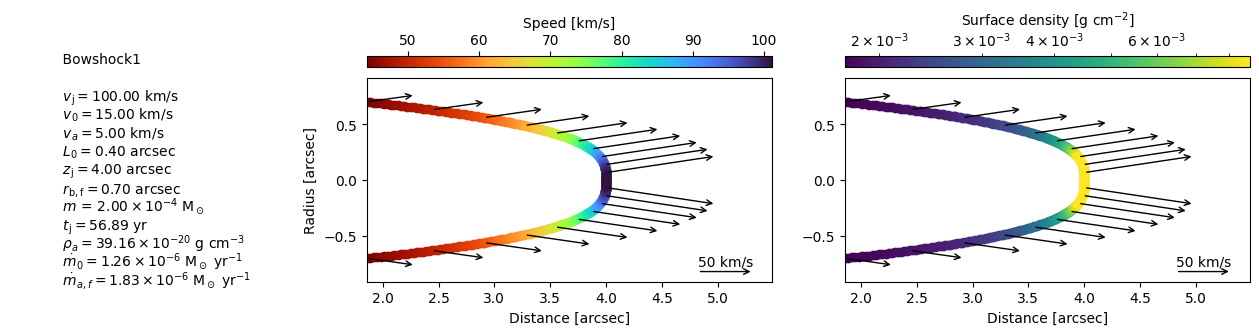

In [6]:
model_plot1 = model1.get_modelplot(
    modelname=modelname1,
    v_arrow_ref=50,
#    figsize=(16,3),
#    textbox_widthratio=0.7,
)

model_plot1.plot()

# You can save the figure with savefig method
model_plot1.savefig(f"{savefolder}{modelname1}_model.pdf")

### Bowshock 2

We follow the same procedure with the second bowshock

In [7]:
modelname2 =  f"Bowshock2"
L0_2 = (0.33 * distpc * u.au).to(u.km).value
zj_2 = (3 * distpc * u.au).to(u.km).value 
vj_2 = 95
va_2 = 5
v0_2 = 10
mass_2 = 0.00015
rbf_obs_2 = (0.55 * distpc * u.au).to(u.km).value

model2 = BowshockModel(
    L0=L0_2,
    zj=zj_2,
    vj=vj_2,
    va=va_2,
    v0=v0_2,
    mass=mass_2,
    rbf_obs=rbf_obs_2,
    distpc=distpc,
    )

In [8]:
print("""
Bowshock 2:
Density of the ambient: {model2.rhoa_gcm3:.2e} g/cm^3
Mass rate of material ejected sideways from the internal working surface: {model2.mp0_solmassyr:.2e} Msun/yr
Mass rate of material incorporated into the bowshock surface: {model2.mpamb_f_solmassyr:.2e} Msun/yr
""")


Bowshock 2:
Density of the ambient: {model2.rhoa_gcm3:.2e} g/cm^3
Mass rate of material ejected sideways from the internal working surface: {model2.mp0_solmassyr:.2e} Msun/yr
Mass rate of material incorporated into the bowshock surface: {model2.mpamb_f_solmassyr:.2e} Msun/yr



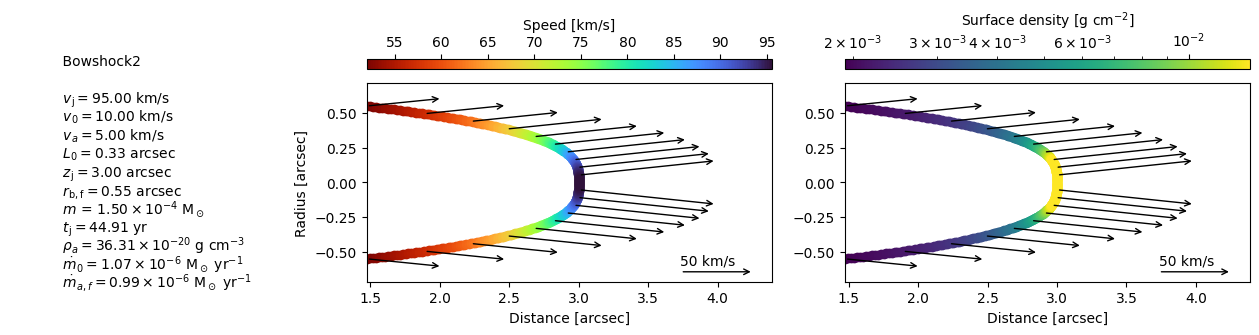

In [9]:
model_plot2 = model2.get_modelplot(
    modelname=modelname2,
    v_arrow_ref=50,
#    figsize=(16,3),
#    textbox_widthratio=0.7,
 )
model_plot2.plot()

# For comparison with the first model, you can put the same x-axis limits as for the first model by:
# model_plot2.axs[0].set_xlim([*model_plot1.axs[0].get_xlim()])
# model_plot2.axs[1].set_xlim([*model_plot1.axs[1].get_xlim()])

# You can save the figure with savefig method
model_plot2.savefig(f"{savefolder}{modelname2}_model.pdf")


## 2. Projection of the bowshocks with **ObsModel** class 

Once we have created the bowshock models, we want to projected their morphology onto the plane-of-sky and their velocity field along the line-of-sight velocity. We can do this using ObsModel class. In this example, we will use the same position angle and inclination for both bowshocks

### Bowshock 1

In [10]:
# inclination angle of the bowshock axis with the line-of-sight. Use
# innclination angles > 90 for redshifted jets, <90 for blueshifted jets
# [degrees]
i_deg = 110

# Position angle of the bowshock [degrees]
pa_deg = -10

# Systemic velocity of the source
vsys = 5

model_obs1 = ObsModel(
    model=model1, # instantiation of BowshockModel
    i_deg=i_deg, 
    pa_deg=pa_deg,
    vsys=vsys, 
    )


We can obtain a visualization of the projected morphology and kinematics of the bowshock model using the _get_modelplot_ method 

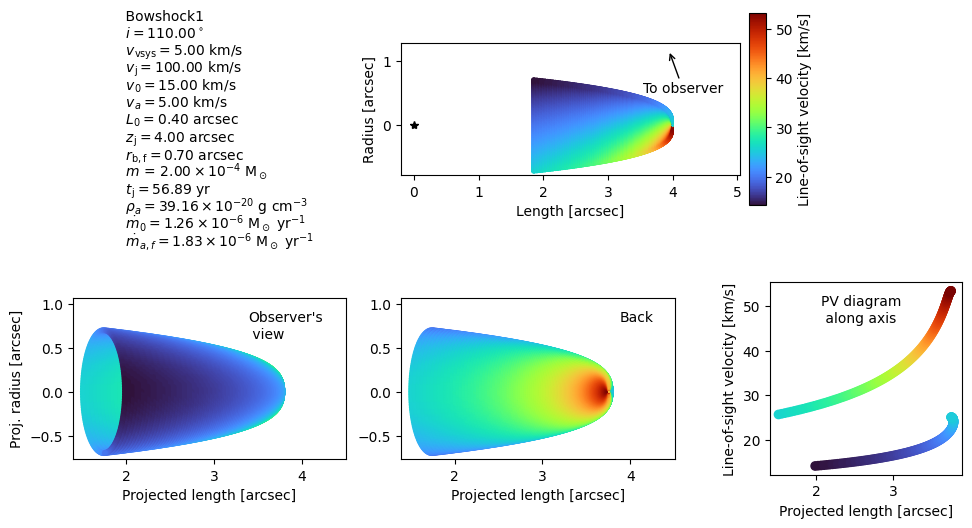

In [11]:
model_obs_plot = model_obs1.get_obsmodelplot(
    modelname=modelname1,
    figsize=(12, 6),
    )

model_obs_plot.plot()
# Make your custom modifications on the plot here
# For example:
# model_obs_plot.axs[0].set_xlim([0, 5])

model_obs_plot.savefig(figname=f"{savefolder}{modelname1}_modelproj.jpg", dpi=300)

### Bowshock 2

We do the same for bowshock 2

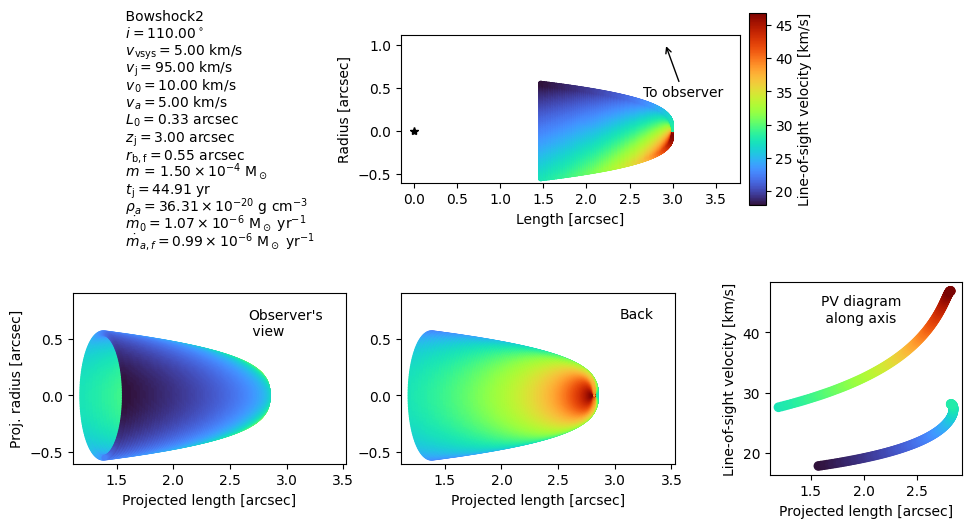

In [12]:
model_obs2 = ObsModel(
    model2,
    i_deg=i_deg, 
    pa_deg=pa_deg,
    vsys=vsys, 
    )

model_obs_plot2 = model_obs2.get_obsmodelplot(
    modelname=modelname2,
    figsize=(12, 6),
    )

model_obs_plot2.plot()
# Make your custom modifications on the plot here
# model_obs_plot.axs[0].set_xlim([0, 5])
model_obs_plot.savefig(figname=f"{savefolder}{modelname2}_modelproj.jpg", dpi=300)

## 3. Computation of the masses in the spectral cube with **BowshockCube**

Let's now compute the masses in each pixel and each channel of the spectral cube for each of the bowshocks. **You can use the position velocity diagrams of the last two figures in order to choose an appropiate range of velocities covered by the spectral cubes (vhc0 and vchf) and the physical size (xpmax) of the channel maps**. Be aware that, due to the thermal+turbulent line of sight velocity dispersion (controled by vt parameter), the velocity range covered by the spectral cube should be higher than the one displayed in the position-velocity diagrams shown in the last figures. Otherwise, bowshock model will not be fully covered (velocity disperions are not included in the last two figures)

In [13]:
# Number of model points along the z-axis direction
nzs = 1000

# Number of azimuthal angle phi for each z-axis point to calculate the bowshock solution
nphis = 500

# Number of spectral channel maps
nc = 50

# Central velocity of the first channel map [km/s]
vch0 = 10

# Central velocity of the last channel map [km/s]. Set to None if chanwidth is used.
vchf = 60

# Width of the velocity channel [km/s]. If chanwidth>0, then vch0<vchf, if
# chanwidth<0, then vch0>vchf. Set to None if vchf is used.
chanwidth = None

# Number of pixels in the x and y axes
nxs, nys = (150, 150)

# Physical size of the channel maps along the x axis [arcsec]
xpmax = 5

# Thermal+turbulent line-of-sight velocity dispersion [km/s] 
# If thermal+turbulent line-of-sight velocity dispersion is smaller than the
# instrumental spectral resolution, vt should be the spectral resolution. It
# can be also set to a integer times the channel width, in this case it would be
# a string [e.g., "2xchannel"]
vt = "2xchannel"

# Set to true in order to perform a Cloud in Cell interpolation. If False,
# nearest neighbour point sampling will be performed [True/False]
cic = True

# Neighbour channel maps around a given channel map with vch will stop being
# populated when their difference in velocity with respect to vch is higher than
# this factor times vt. The lower the factor, the quicker will be the code, but
# the total mass will be underestimated. If vt is not None, compare the total
# mass of the output cube with the 'mass' parameter that the user has defined
tolfactor_vt = 3

# Reference pixel [[int, int] or None]
# Pixel coordinates (zero-based) of the source, i.e., the origin from which the
# distances are measured. The first index is the R.A. axis, the second is the
# Dec. axis.
refpix = [75, 15]

# Verbose messages about the computation? [True/False]
verbose = True


### Bowshock 1

In [14]:
model_cube1 = BowshockCube(
    model_obs1,
    nphis=nphis,
    xpmax=xpmax,    
    vch0=vch0, 
    vchf=vchf,
    chanwidth=chanwidth,
    nzs=nzs,
    nc=nc,
    nxs=nxs,
    nys=nys, 
    refpix=refpix, 
    cic=cic,
    vt=vt,
    tolfactor_vt=tolfactor_vt,
    verbose=verbose,
    )

model_cube1.makecube()


Computing masses in the spectral cube...
  0──────────────────────────────────────────────────)100.0% | 72/74s
Checking total mass consistency...

Mass consistency test passed: The input total mass of the bowshock model
coincides with the total mass of the cube.



You can inspect individual channel maps with *_plot_channel_* method

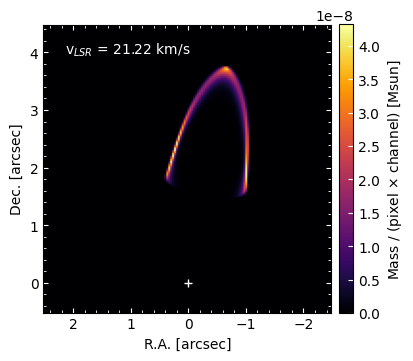

In [15]:
chan = 11
model_cube1.plot_channel(
    chan=chan,
    savefig=f"{savefolder}{modelname1}_channel{chan}.pdf"
    )

You can use the _plot_channels_ method in order to visualize several channel maps

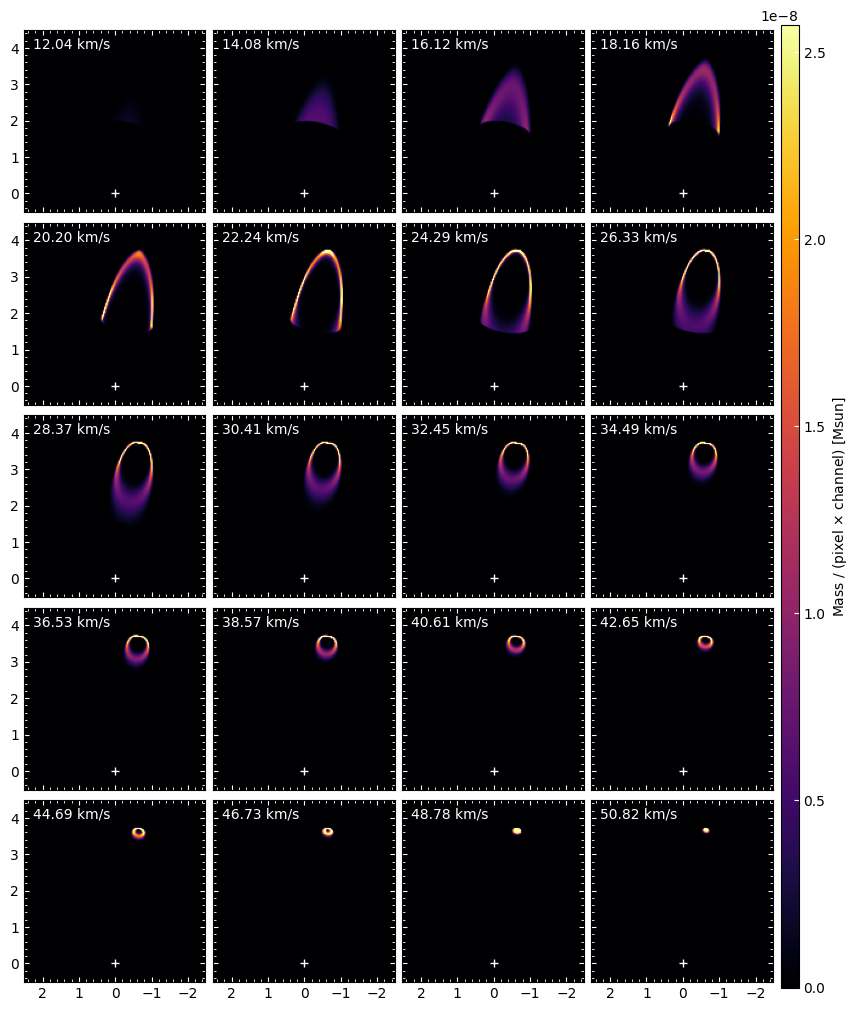

In [16]:
model_cube1.plot_channels(
    nrow=5, ncol=4, 
    vmax=np.percentile(model_cube1.cube, 99.9),
    savefig=f"{savefolder}{modelname1}_channels.pdf",
    )

### Bowshock 2

We set the same parameters for the second bowshock, so we can later combine both models using **CubeProcessing** class

In [17]:
model_cube2 = BowshockCube(
    model_obs2,
    nphis=nphis,
    xpmax=xpmax,    
    vch0=vch0, 
    vchf=vchf,
    chanwidth=chanwidth,
    nzs=nzs,
    nc=nc,
    nxs=nxs,
    nys=nys, 
    refpix=refpix, 
    cic=cic,
    vt=vt,
    tolfactor_vt=tolfactor_vt,
    verbose=verbose,
    )

model_cube2.makecube()


Computing masses in the spectral cube...
  0──────────────────────────────────────────────────)100.0% | 77/78s
Checking total mass consistency...

Mass consistency test passed: The input total mass of the bowshock model
coincides with the total mass of the cube.



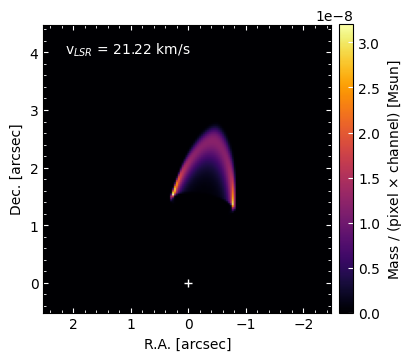

In [18]:
chan = 11
model_cube2.plot_channel(
    chan=chan,
    savefig=f"{savefolder}{modelname2}_channel{chan}.pdf"
    )

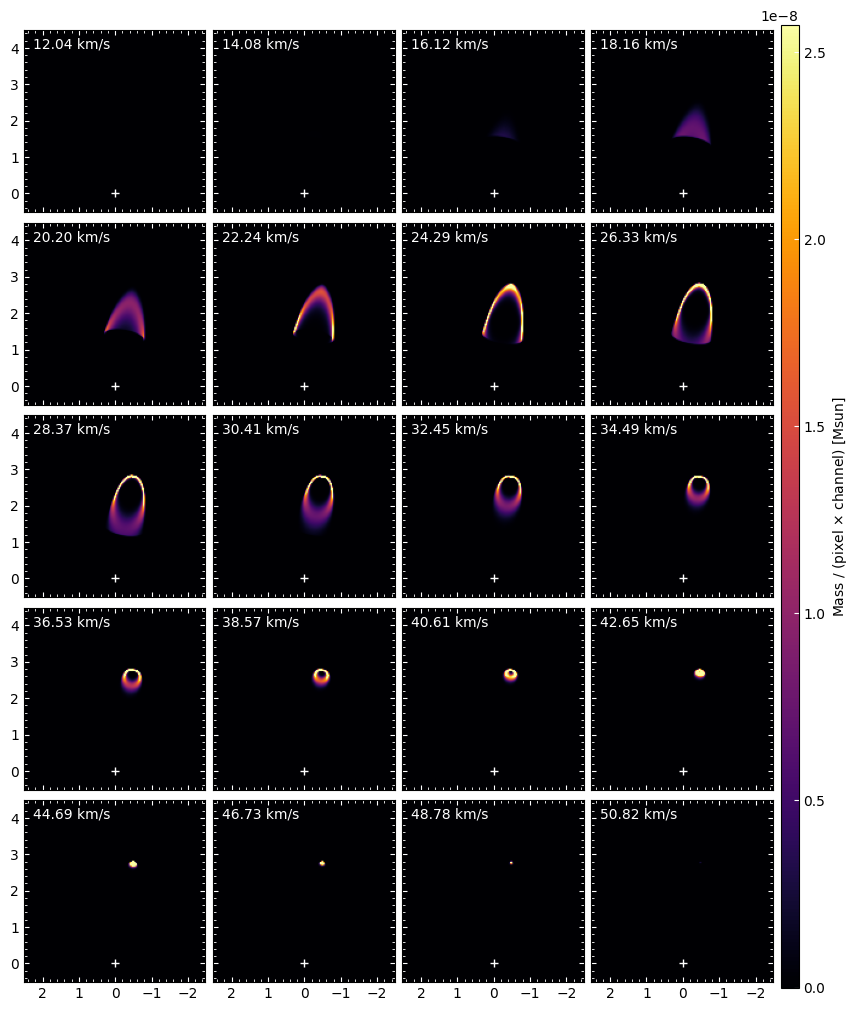

In [19]:
model_cube2.plot_channels(
    nrow=5, ncol=4, 
    vmax=np.percentile(model_cube1.cube, 99.9),
    savefig=f"{savefolder}{modelname2}_channels.pdf",
    )

## 4. Obtaining intensity maps with **CubeProcessing** class

We will use now **CubeProcessing** class to combine both cubes and perform the radiative transfer in order to obtain the intensities of the CO(3-2) transition. Also, would be able to obtain the moments and position-velocity diagrams. All the cubes and images can be save fits format and be open for further inspection with casaviewer, CARTA, or ds9.

In [20]:
# Source coordinates [deg, deg] 
ra_source_deg, dec_source_deg = 84.095, -6.7675

# Upper level of the CO rotational transition
J = 3

# Frequency of the transition [GHz]
nu = 345.79598990

# CO abundance
abund = 8.5 * 10**(-5)

# Mean molecular mass per hydrogen molecule
meanmolmass = 2.8

# Permanent dipole moment [Debye]
mu = 0.112

# Excitation temperature [K]
Tex = 100

# Background temperature [K]
Tbg = 2.7

# Beam size [arcsec]
bmaj, bmin = (0.2, 0.15)

# Beam position angle [degrees]
pabeam = +30

# Spectral cubes in offset or sky coordinates? ["offset" or "sky"]
coordcube = "offset"

# Angle to rotate the image [degrees]
parot = 0

# Standard deviation of the noise of the map, before convolution. Set
# to None if maxcube2noise is used [Jy/beam]
sigma_beforeconv = 0.05

# Standard deviation of the noise of the map, before convolution, relative to
# the maximum pixel in the cube. The actual noise will be computed after
# convolving. This parameter would not be used if sigma_beforeconve is not
# None.
maxcube2noise = 0.07

### 4.1 Combination of bowshock model cubes

The first step is to combine both bowshock model cubes. We can do this with passing a list of all the BowshockCube instances (in our case, model_cube1 and model_cube2) to CubeProcessing 

In [36]:
# astropy units are optional, and any units of the right quantity would work. If
# you use a float instead, you should give parameters in the specific units
# described in the comments from the cell above (see also input parameters from
# the documentation).
cubes_proc = CubeProcessing(
    [model_cube1, model_cube2], # we want to combine both models
    modelname="notebook_tutorial",
    J=J,
    nu=nu * u.GHz, 
    abund=abund,
    meanmolmass=meanmolmass,
    mu=mu * u.Debye,
    Tex=Tex * u.K,
    Tbg=Tbg * u.K,
    coordcube=coordcube,
    ra_source_deg=ra_source_deg,
    dec_source_deg = dec_source_deg,
    bmin=bmin,
    bmaj=bmaj,
    pabeam=pabeam,
    papv=model_cube1.pa_deg,
    parot=0,
    sigma_beforeconv=sigma_beforeconv,
    maxcube2noise=maxcube2noise,
)

Let's check that the cubes with the masses of each bowshock have been combined in one single cube. We can visualize the masses with _plot_channel_ method. The input "m", indicates you are interested in plotting the masses, which is the only cube computed so far

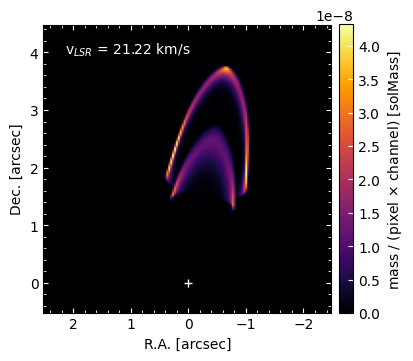

In [37]:
cube_key = "m"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    savefig=f"{savefolder}channel{chan}.pdf",
    )

### 4.2 Computation of coulmn densities

In this example, we will go through the steps to compute the intensities of the CO(3-2) transition. First, lets compute the total column densities (H2 plus heavier components).

In [38]:
cubes_proc.calc_Ntot()


Computing column densities...
column densities has been calculated (Ntot cube)



We can inspect a particular channel with _plot_channel_ method

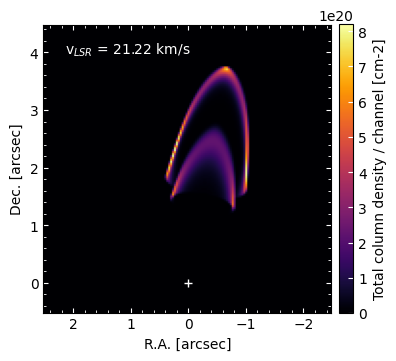

In [39]:
cube_key = "Ntot"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    savefig=f"{savefolder}{cube_key}_channel{chan}.pdf"
    )

Let's now compute the CO (our emitting molecule) column densities 

In [40]:
cubes_proc.calc_Nmol()


Computing column densities of the emitting molecule...
The column densities of the emitting molecule have been calculated (Nmol cube)



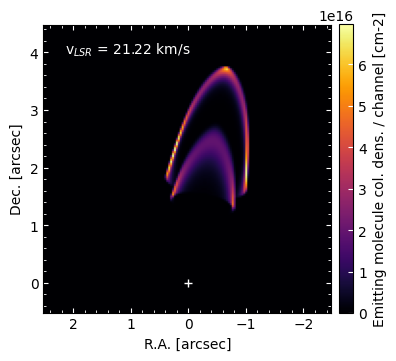

In [41]:
cube_key = "Nmol"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    savefig=f"{savefolder}{cube_key}_channel{chan}.pdf"
    )

### 4.3 Computation of opacities

In [42]:
cubes_proc.calc_tau()


Computing opacities...
Opacities has been calculated (tau cube)



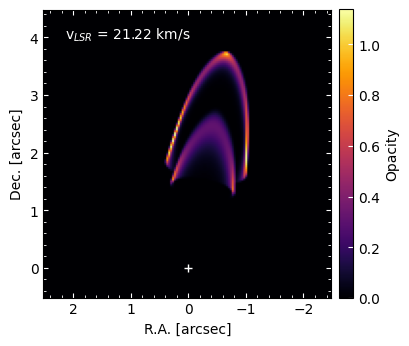

In [43]:
cube_key = "tau"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    savefig=f"{savefolder}{cube_key}_channel{chan}.pdf",
    )

### 4.4 Computation of intensities

In [44]:
cubes_proc.calc_I()


Computing intensities...
Intensities has been calculated (I cube)



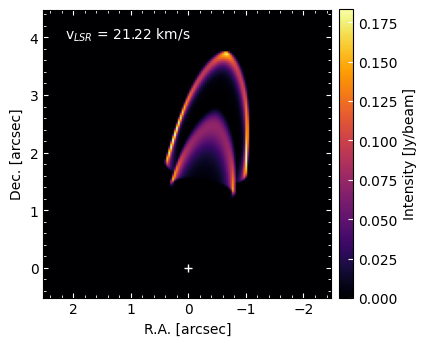

In [45]:
cube_key = "I"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    savefig=f"{savefolder}{cube_key}_channel{chan}.pdf",
    )

Note that although the units are Jy/beam because we provided a beam size (if bmaj and bmin parameters would have been None, the intensity units would have been Jy/arcsec^2). However, the model is not convolved yet. In order to perform the convolution with the beam, we should use the __convolve__ method

In [47]:
cubes_proc.convolve(ck="I")


Convolving I... 
  0──────────────────────────────────────────────────)100.0% | 1/1s

I_c cube has been created by convolving I cube with a gaussian kernel of
size [4.50, 6.00] pix and PA of 30.00deg



Let us inspect the convolved cube. Note that we should now use the label "I_c" to plot the cube of the convolved intesities 

In [ ]:
cube_key = "I_c"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    add_beam=True,
    savefig=f"{savefolder}{cube_key}_channel{chan}.pdf",
    )

In [ ]:
cubes_proc.plot_channels(
    ck="I_c",
    vmax=np.percentile(cubes_proc.cubes["I_c"], 99.9),
    nrow=5, ncol=4, 
    add_beam=True,
    savefig=f"{savefolder}{cube_key}_channels.pdf",
    )

#### Add noise and convolve

Additionally, you can add Gaussian noise to your channel maps by using _add_noise_ method. Lets add noise to the intensity cube and then convolve.

In [ ]:
cubes_proc.add_noise(ck="I")
cubes_proc.convolve(ck="I_n")

The label of the cube of the intensities with noise and convolved is "I_nc". Let's inspect it

In [ ]:
cube_key = "I_nc"
chan = 11

cubes_proc.plot_channel(
    ck=cube_key,
    chan=chan,
    add_beam=True,
    savefig=f"{savefolder}{cube_key}_channel{chan}.pdf",
    )

In [ ]:
cube_key = "I_nc"

cubes_proc.plot_channels(
    ck=cube_key,
    nrow=5, ncol=4, 
    # vmin=-0.005,
    # vcenter=(0.07-0.005)/2,
    # vmax=0.07,
    add_beam=True,
    savefig=f"{savefolder}{cube_key}_channels.pdf",
    )

One can inspect the cubes computed so far and stored in cubes_proc:

In [ ]:
cubes_proc.cubes.keys()

The next table summarize the meaning of the cube labels and the units 

| Quantity                         | Cube label           | Unit
| :--------------------------------|:-------------------:|:--------------:
| Mass                             | m                   | solar mass
| Intensity                        | I                   | Jy/beam
| Column density                   | Ntot                | cm-2
| Emitting molecule column density | Nmol                 | cm-2
| Opacities                        | tau                 |


and the labels for the operations performed to the cubes 



| Method     | Cube label
|:-----------|:----------------:
| add_source | s
| rotate     | r
| add_noise  | n
| convolve   | c

**Note**: CubeProcessing can compute directly the intensities using calc_I, without the need to run previously calc_Nmol and calc_tau methods. If calc_I is run before explicitely computing the CO column densities or the opacities, they will be computed internally and stored in _cubes_ attribute.

You can save any cube stored in the CubeProcessing instance with _savecube_ method. For example:

In [ ]:
cube_key = "I_nc"
cubes_proc.savecube(
    ck=cube_key,
    fitsname=f"{savefolder}fits/{cube_key}.fits"
    )

### 4.5 Position-velocity and moment maps

Let's now compute the position velocity diagram and moment images for some spectral cubes

#### Position velocity diagram

In [ ]:
cube_key = "I_c"
cubes_proc.plotpv(
    ck=cube_key,
    halfwidth=2,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_pv.fits"
    )

In [ ]:
cube_key = "I_nc"
cubes_proc.plotpv(
    ck=cube_key,
    halfwidth=2,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_pv.fits"
    )

#### Moment 0

In [ ]:
cube_key = "I_nc"
cubes_proc.plotmom0(
    ck=cube_key,
    add_beam=True,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_mom0.fits"
    )


#### Maximum intensity

In [ ]:
cube_key = "I_nc"
cubes_proc.plotmaxintens(
    ck=cube_key,
    add_beam=True,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_maxintens.fits"
    )


#### Moment 1

In [ ]:
cube_key = "I_c"
cubes_proc.plotmom1(
    ck=cube_key,
    add_beam=True,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_mom1.fits"
    )

You can control your sigma clipping with mom1clipping argument, which is useful for your noisy maps (with key "I_nc")

In [ ]:
cube_key = "I_nc"
cubes_proc.plotmom1(
    ck=cube_key,
    mom1clipping="5xsigma",
    add_beam=True,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_mom1.fits"
    )


#### Moment 2

In [ ]:
cube_key = "I_c"
cubes_proc.plotmom2(
    ck=cube_key,
    add_beam=True,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_mom2.fits"
    )

In [ ]:
cube_key = "I_nc"
cubes_proc.plotmom2(
    ck=cube_key,
    mom2clipping="4xsigma",
    add_beam=True,
    savefits=True,
    fitsname=f"{savefolder}fits/{cube_key}_mom2.fits"
    )


## Appendix 1: Computing all CubeProcessing output at once

Alternatively, you can use the method _calc_ of CubeProcessing in order to calculate all the desired outputs. The input of _calc_ should be a dictionary, where the keys are the desired quantities and the values should be a list of strings indicating the operations to be performed. 

These are the available quantities of the spectral cubes:

- "mass": Total mass of molecular hydrogen in solar mass
- "total_column_density": Total (H2 + heavier components) column density in cm-2.
- "emitting_molecule_column_density": Column density of the emitting molecule in cm-2.
- "intensity": Intensity in Jy/beam.
- "tau": Opacities.

The values of the dictionary are lists of strings indicating the operations to be performed over the cube. These are the available operations:

- "add_source": Add a source at the reference pixel, just for spatial reference purposes.
- "rotate": Rotate the whole spectral cube by an angle given by parot parameter.
- "add_noise": Add gaussian noise, defined by maxcube2noise parameter.
- "convolve": Convolve with a gaussian defined by the parameters bmaj, bmin, and pabeam.
- "moments_and_pv": Computes the moments 0, 1, and 2, the maximum intensity and the PV diagram.

The operations will be performed folowing the order of the strings in the list (from left to right). The list can be left empty if no operations are desired.


In [ ]:
outcubes = {
    "intensity": ["add_noise", "convolve", "moments_and_pv"],
    "opacity": [],
    "total_column_density": [],
    "emitting_molecule_column_density": [],
    "mass": [],
    }

cubes_proc.calc(outcubes)
cubes_proc.savecubes(outcubes)


In [ ]:
cubes_proc.plot_channel(ck="I_nc", chan=20, add_beam=True)

In [ ]:
cubes_proc.momentsandpv_and_params("I_nc", mom1clipping="5xsigma", mom2clipping="4xsigma", add_beam=True)

## Appendix 2: Custom computation of intensities